<a href="https://colab.research.google.com/github/AhnafIslamIO/summer-data-analytics-Microcredential/blob/main/Copy_of_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [4]:
df.head()# printed the data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [5]:
df.shape# printing data size

(48166, 5)

In [6]:
df.columns #noticing the amount of colums

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [7]:
ny_df = df[df['state']=='New York'] # only selecting new york

In [8]:
ny_df.head() # printing first five to satisfy the cell above

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [9]:
ny_df.shape # printing a shope of data

(872, 5)

In [10]:
ny_df.tail() # printing last 5 rows

,date,state,fips,cases,deaths
47920,2022-07-16,New York,36,5703638,69245
47976,2022-07-17,New York,36,5706285,69245
48032,2022-07-18,New York,36,5722320,69268
48088,2022-07-19,New York,36,5727636,69322
48144,2022-07-20,New York,36,5735607,69352


In [11]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [12]:
#total number of cases
ny_df['cases'].max()

5735607

In [13]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

1921316337

Finding new covid 19 cases on daily basis (new cases added everyday)

In [14]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [18]:
ny_df['new_cases'] = newcase # total number of new cases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
ny_df.head(10) # counted data

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [17]:
ny_df['new_cases'].sum() # total

5735607

In [19]:
ny_cases = ny_df['cases'] # new cases for new york
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [20]:
type(ny_new_cases) # new cases

pandas.core.series.Series

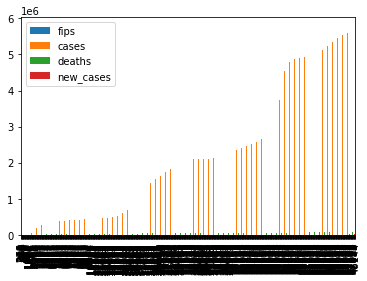

In [22]:
ny_df.plot(kind='bar') # plot of graph

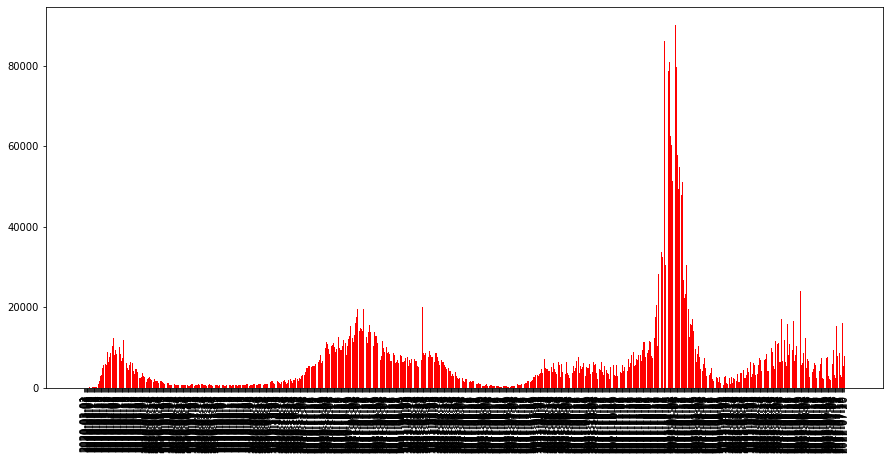

In [23]:
plt.figure(figsize=(15,7)) # setting plot figures
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [24]:
ny_cases_30 = ny_df['cases'][-31:-1] # getting a month of information
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [25]:
# ny_dates_30

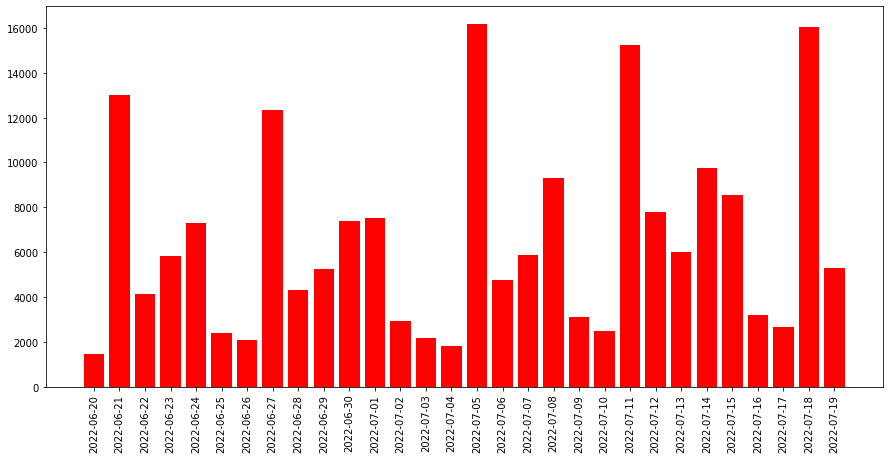

In [27]:
plt.figure(figsize=(15,7)) # plot of last 30 days
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

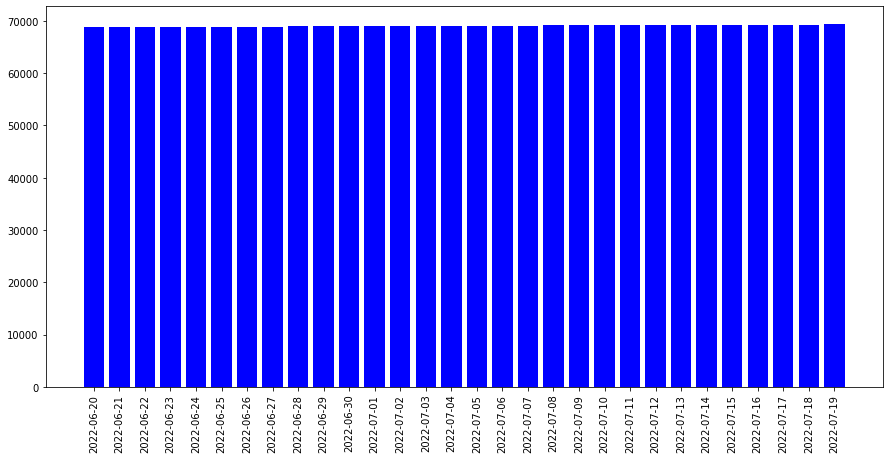

In [28]:
plt.figure(figsize=(15,7)) # plot of deaths
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [29]:
states = ['New York', 'California','Florida', 'Texas','Arizona'] # specific state selection

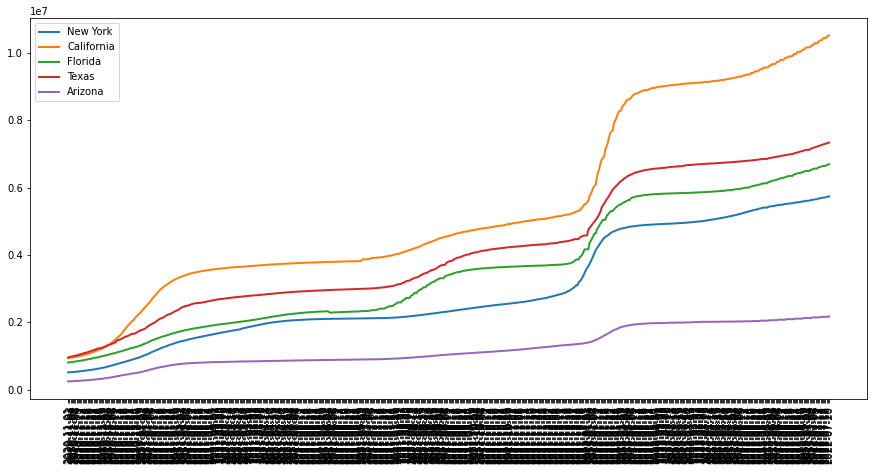

In [30]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --After analyzing the NY state data for Covid 19 First, during the month of April 2020, there were fewer cases and deaths each day such as one case and zero deaths on 2020-03-01 but as the days gone by, there still was an increase in cases. However, once July 2022 started, there was an rapid increase in the number of cases, new cases, and deaths. There was 5691891 cases and 69223 deaths on 2022-07-14. The number of cases, new cases, and deaths increased by approximately 100% in that span. Despite these increases, from 2020 to 2022, the number of cases always exceeded the amount of deaths and new cases per day. Compared to other states, the top three states with increasing cases per date, was California, Texas and Florida. 
2.   Conclusion 2
     --The three states that had the highest increase number of cases all were states with high temperatures compared to New York and Arizona.  these three tops states have the highest population as well  in the last 30 days in NY, on 2022-06-21, 2022-06-27, 2022-07-05, and 2022-07-11, some days had a big increase in the number of new cases while the new days the number of new cases decrease. 
